In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as st
from sklearn.covariance import MinCovDet
from time import time
import theano
theano.config.gcc.cxxflags = "-Wno-c++11-narrowing"

from context import predicate_search
from predicate_search import PredicateSearch
#from predicate_search import PredicateInduction, PredicateData, PredicateSearch, ContBasePredicate, DiscBasePredicate, CompoundPredicate, RobustNormal

In [2]:
raw_data = pd.read_csv('intel_sensor_s4.csv')
raw_data.dtime = pd.to_datetime(raw_data.dtime)
startdate = '2004-2-28'
enddate = '2004-3-3'
df = raw_data[(raw_data.dtime>=startdate) & (raw_data.dtime<=enddate)].reset_index(drop=True).drop_duplicates()

In [3]:
tick = time()
ps = PredicateSearch(df, model='robust_cov',
                     targets=['temperature'], specificity=.8, bins=100)
print(time() - tick)

5.634779214859009


In [4]:
p = ps.search()

(temperature > 120.547 and temperature <= 122.153)


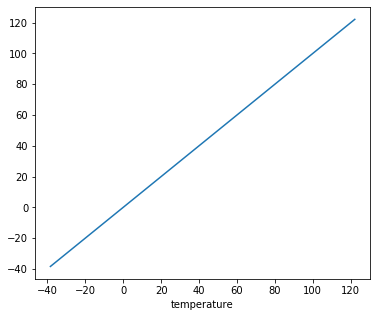

(voltage > 2.275 and voltage <= 2.354)


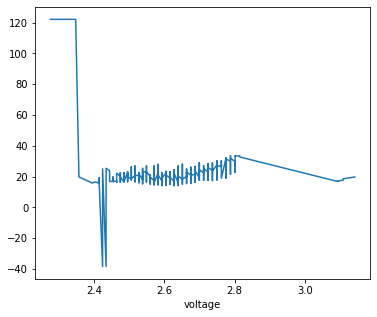

moteid in [15.0] and dtime > '2004-03-02 06:53:15.495036032' and dtime <= '2004-03-02 08:47:13.275416064'


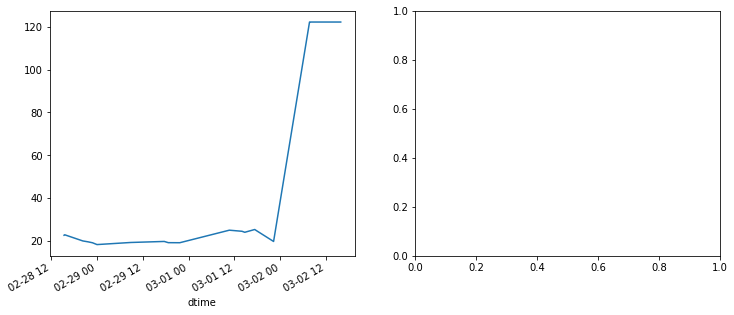

(light > 1828.887 and light <= 1847.36) and dtime > '2004-03-02 06:53:15.495036032' and dtime <= '2004-03-02 08:47:13.275416064' and moteid in [15.0]


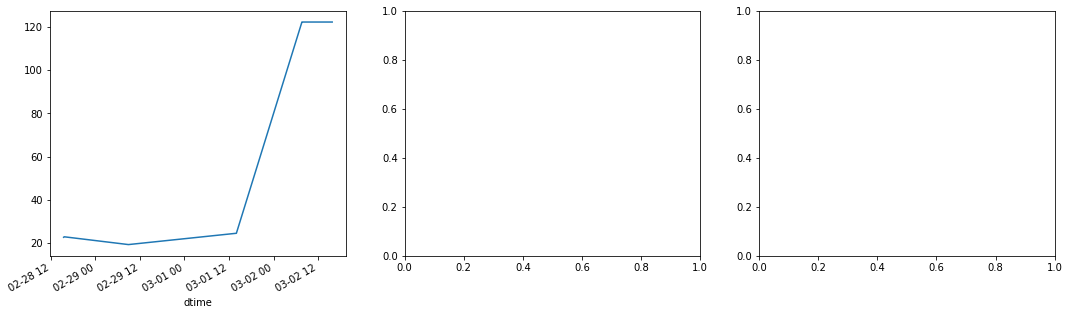

moteid in [15.0] and (light > 1828.887 and light <= 1847.36) and (temperature > 120.547 and temperature <= 122.153)


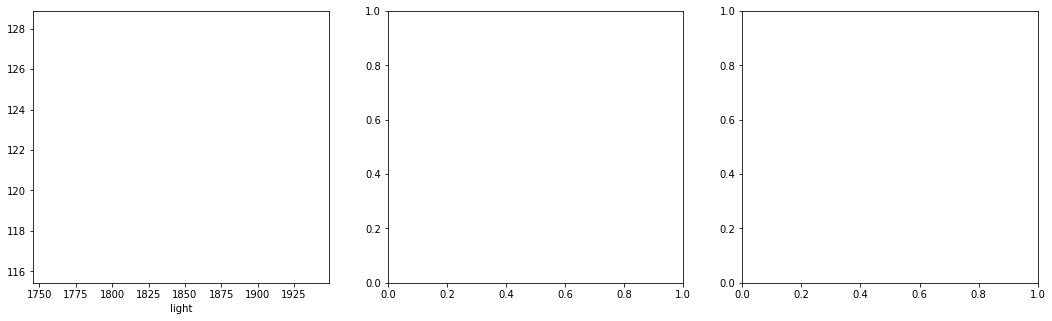

(humidity > -3.412 and humidity <= 18.918)


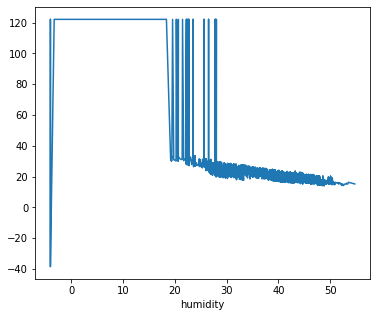

(humidity > 19.506 and humidity <= 23.031) and dtime > '2004-03-02 07:50:14.385226112' and dtime <= '2004-03-02 08:47:13.275416064'


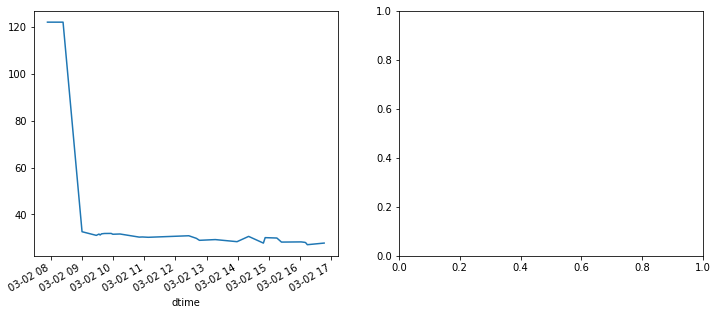

(humidity > 21.856 and humidity <= 23.031) and (light > 1828.887 and light <= 1847.36) and moteid in [15.0]


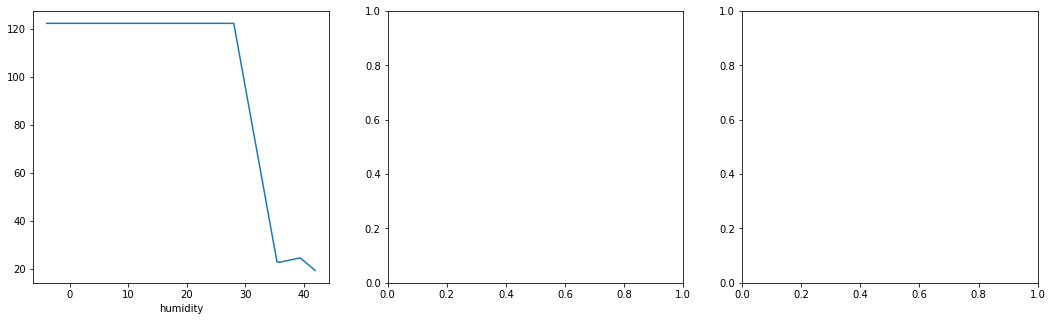

(humidity > -4.059 and humidity <= -3.412) and (light > 1828.887 and light <= 1847.36)


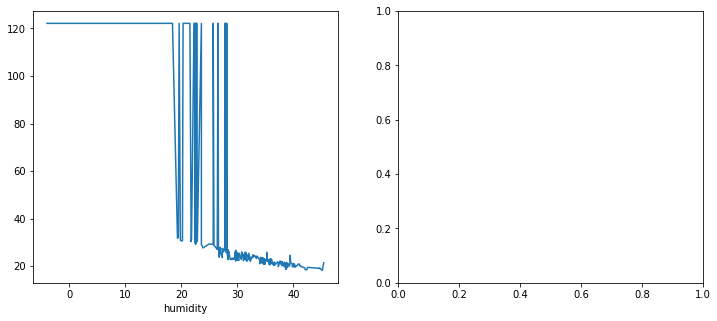

(humidity > -4.059 and humidity <= -3.412) and dtime > '2004-03-02T15:26:05.506746112' and dtime <= '2004-03-02T16:23:04.396936064'


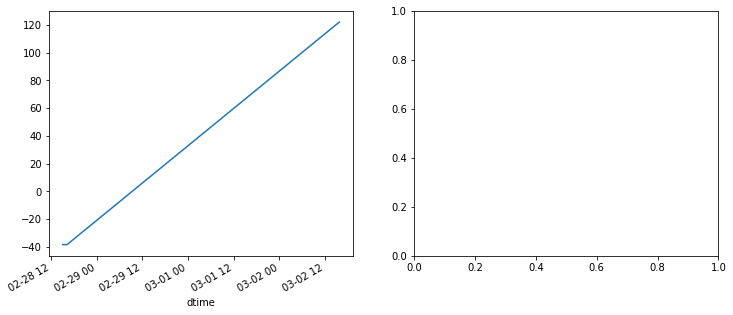

(light > 1828.887 and light <= 1847.36) and dtime > '2004-03-02T15:26:05.506746112' and dtime <= '2004-03-02T16:23:04.396936064'


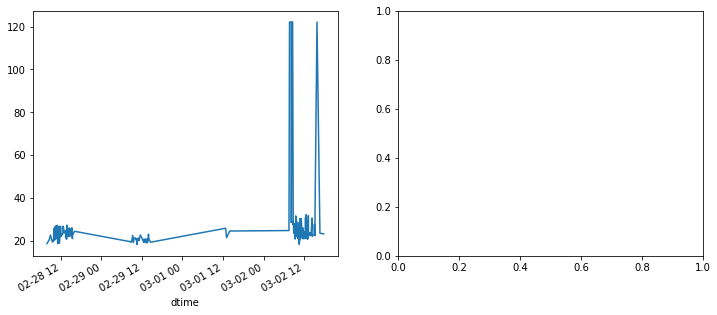

(humidity > 20.093 and humidity <= 21.268) and (light > 1828.887 and light <= 1847.36) and moteid in [15.0]


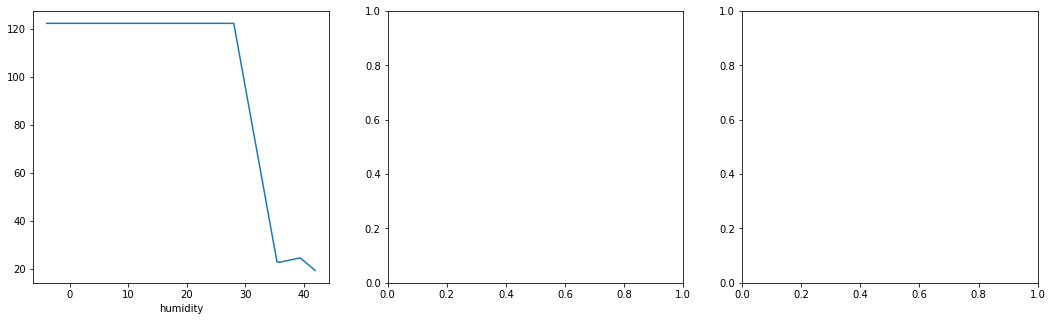

(humidity > 27.732 and humidity <= 28.32) and dtime > '2004-03-02T07:50:14.385226112' and dtime <= '2004-03-02T08:47:13.275416064' and moteid in [15.0]


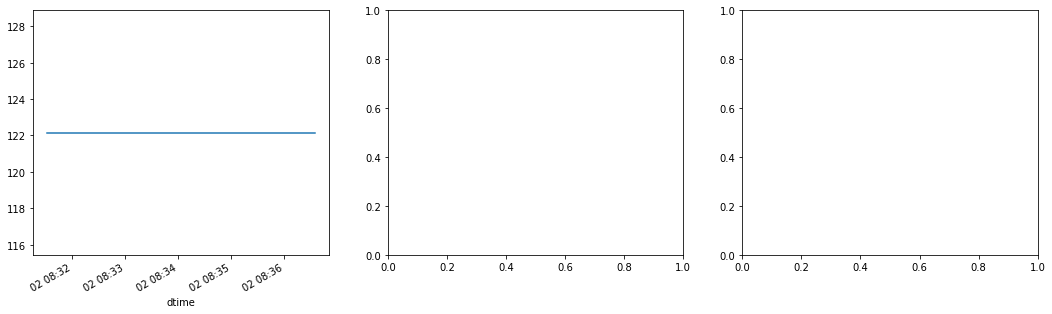

(humidity > 27.732 and humidity <= 28.32) and (light > 1828.887 and light <= 1847.36) and moteid in [15.0]


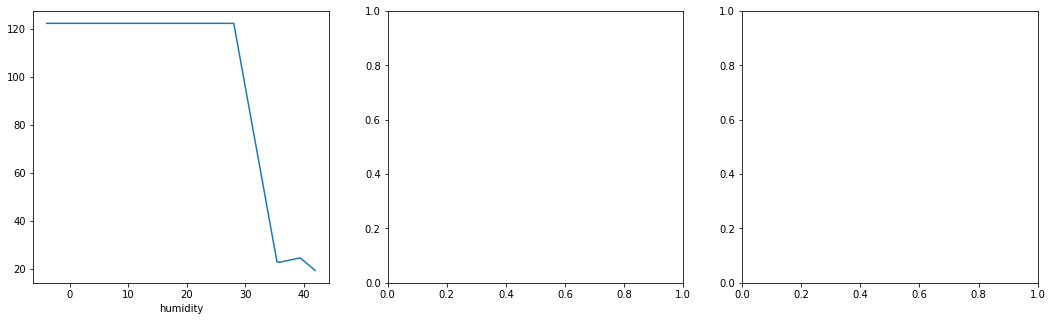

In [5]:
for pi in p.base_predicates:
    print(pi)
    d = ps.get_data(pi, 'temperature')
    features = pi.features
    n = len(features)
    fig, axes = plt.subplots(ncols=n, figsize=(6*n, 5))
    if n == 1:
        axes = [axes]
    for i in range(len(features)):
        ax = axes[i]
        feature = features[i]
        d[feature].plot(ax=ax)
        plt.show()

In [6]:
len(ps.predicates)

57

In [7]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
intervals = pd.DataFrame([(interval.left, interval.right) for interval
              in pd.cut(df.temperature, bins=100, right=True).sort_values().unique()])
intervals.columns = ['left', 'right']
intervals['left'] = intervals['left'].shift(-1)

In [ ]:
list(intervals.dropna().to_records(index=False))

In [ ]:
intervals

In [ ]:
inter = pd.DataFrame(intervals['left'][None,:] == intervals['right'][:,None],
                     index=intervals.left, columns=intervals.right)

In [ ]:
inter

In [ ]:
predicate_induction = PredicateInduction()

In [ ]:
predicate_induction.fit(df, how='t', disc_cols=['moteid'])

In [ ]:
targets = ['temperature']

In [ ]:
distances = predicate_induction.m.get_distances(predicate_induction.norm_data, targets)

In [ ]:
d = pd.Series(distances).sort_values(ascending=False).reset_index(drop=True).reset_index()

In [ ]:
d.plot.scatter(x='index', y=0)

In [ ]:
threshold = 15

In [ ]:
df[distances > threshold].temperature.unique()

In [ ]:
tick = time()
predicates = predicate_induction.predicate_induction(targets, threshold, c=1, quantile=0, verbose=True)
print(time() - tick)

In [ ]:
mask = df.eval('humidity <= 18.339')

In [ ]:
mask

In [ ]:
df[(df.humidity >= -3) & (df.humidity <= 18.399)]

In [ ]:
df.humidity.max()

In [ ]:
predicates

In [ ]:
STOP

In [ ]:
tick = time()
predicates = predicate_induction.predicate_induction(targets, threshold=None, c=1, quantile=.25, verbose=True)
print(time() - tick)

In [ ]:
predicates